Christopher Woolford, Oct 27th 2024. This Jupyter Notebook plots scaling curves for PyPIC. This script will over number of particles.

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

These runs were done with the following parameters:
    x_wind = 1e-2 m,
    y_wind = 1e-2 m,
    z_wind = 1e-2 m,
    Nx     = 30,
    Ny     = 30,
    Nz     = 30,
    t_wind = 100e-12 s,
    solver = 'spectral',
    Te = 100 K,
    Ti = 100 K,
    q_e  = 1.602e-19 C,
    m_e  = 9.1093837e-31 Kg,
    q_i  = 1.602e-19 C,
    mass = 1.67e-27 Kg,
    all plotting off

I accidentally took the ions and electrons to have the same charge. I need to go back an re-run the simulations to be thorough.

In [9]:
N_particles = [1000, 5000, 10000, 50000, 100000, 200000, 500000, 1000000, 2000000,
               5000000]
duration = [4.996438980102539, 5.838474750518799, 6.864267349243164,
                 12.07140851020813, 18.30331587791443, 39.689276695251465,
                 86.15956997871399, 169.35861682891846, 413.2385325431824,
                 947.5281612873077]

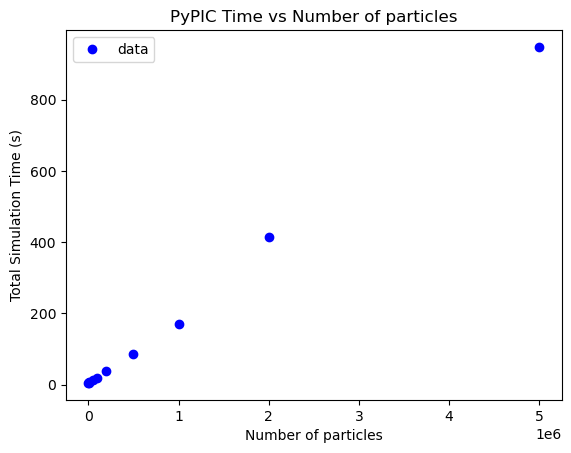

In [10]:
plt.plot(N_particles, duration, 'o', color='b', label='data')
#plt.plot(N_particles, duration)
plt.xlabel('Number of particles')
plt.ylabel('Total Simulation Time (s)')
plt.title('PyPIC Time vs Number of particles')
plt.legend()
plt.savefig('pypic_time_vs_particles.png')

The particle scaling for a fixed spatial window and resolution appears to be linear.
I know need to fit this relation and compare it to a VPIC simulation

In [11]:
slope, intercept, r, p, se = stats.linregress(N_particles, duration)

In [12]:
print(f'Slope: {slope}')
print(f'Intercept: {intercept}')

Slope: 0.00019054523024351975
Intercept: 1.4674051462314992


1.5 seconds appears to be the overhead for PyPIC. I should also look into how this scales for different spatial windows

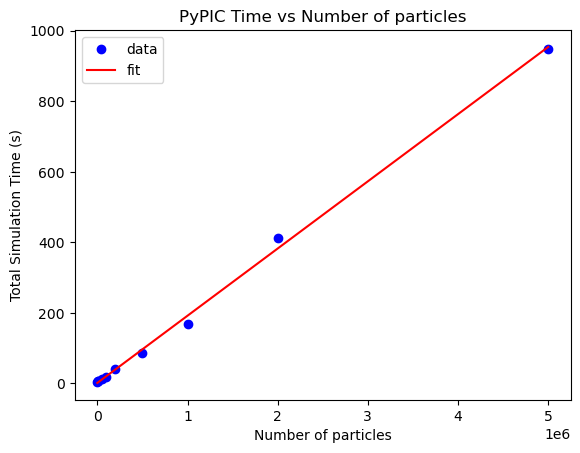

In [13]:
x = np.linspace(0, 5000000, 100)
y = slope * x + intercept
plt.plot(N_particles, duration, 'o', color='b', label='data')
plt.plot(x, y, color='r', label='fit')
plt.legend()
plt.xlabel('Number of particles')
plt.ylabel('Total Simulation Time (s)')
plt.title('PyPIC Time vs Number of particles')
plt.savefig('pypic_time_vs_particles_fit.png')